# Code Sandbox

A place to test new code and functions

In [1]:
# import packages and set working directory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from math import exp
import seaborn as sns

#os.chdir('../maize-Toff')

# import objects
from farm import Climate
from farm import Soil
from farm import Crop
from farm import CropModel
from farm.functions import *

In [2]:
climate = Climate(station='OL JOGI FARM')

soil = Soil(texture='loam')
crop = Crop(soil=soil, lgp=180)
soil.set_nZr(crop)

model = CropModel(crop=crop, climate=climate, soil=soil)
model.run()
o = model.output() # This is the correct length
o

,kc,LAI,stress,R,s,E,ET,T,L,dsdt,dos,doy
0,0.3,0.750000,1.000000,0.458075,0.300000,0.099097,0.099097,0.000000,0.0,0.358978,0.0,79
1,0.3,0.750000,1.000000,0.000000,0.301592,0.103067,0.103067,0.000000,0.0,-0.103067,0.0,80
2,0.3,0.750000,1.000000,0.000000,0.301135,0.101922,0.101922,0.000000,0.0,-0.101922,0.0,81
3,0.3,0.750000,1.000000,0.000000,0.300683,0.100793,0.100793,0.000000,0.0,-0.100793,0.0,82
4,0.3,0.750000,1.000000,0.000000,0.300236,0.099682,0.099682,0.000000,0.0,-0.099682,0.0,83
...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.6,2.066667,0.462244,0.000000,0.429236,0.287360,1.345872,1.058512,0.0,-1.345872,183.0,282
204,0.6,2.033333,0.488794,0.000000,0.423267,0.278476,1.257279,0.978803,0.0,-1.257279,184.0,283
205,0.6,2.000000,0.514267,0.000000,0.417692,0.270333,1.175537,0.905204,0.0,-1.175537,185.0,284
206,0.6,1.966667,0.538668,0.000000,0.412479,0.262869,1.100071,0.837202,0.0,-1.100071,186.0,285


Text(0, 0.5, 'Static Water Stress')

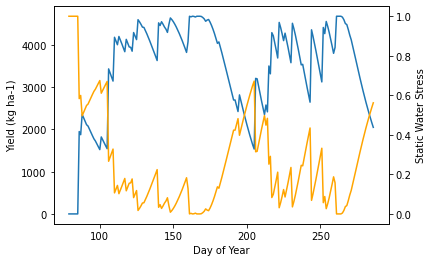

In [13]:
# plot how potential yield changes over the course of the year based on water stress:

#plt.plot([calc_yield(i) for i in o['stress']])

#plt.plot(o['stress'])

fig, ax = plt.subplots()

ax.plot(o['doy'],[calc_yield(i) for i in o['stress']])
ax.set_xlabel("Day of Year")
ax.set_ylabel("Yield (kg ha-1)")

ax2 = ax.twinx()
ax2.plot(o['doy'],o['stress'], color='orange')
ax2.set_ylabel("Static Water Stress")

fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

ValueError: static stress, -1 is less than 0

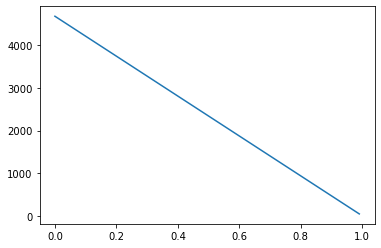

In [28]:
# write function that converts stress to yield

def calc_yield(stress=None, max_yield = 4680):
    yield_kg_ha = -max_yield*stress + max_yield
    
    if stress > 1:
        raise ValueError("static stress, {stress} is larger than 1".format(
                stress=stress))
    if stress < 0:
        raise ValueError("static stress, {stress} is less than 0".format(
                stress=stress))
    
    return yield_kg_ha

calc_yield(0.4)

# Write some tests based on this
df = []
list_of_stress = np.arange(0,1,0.01)
for i in list_of_stress:
    obj  = calc_yield(i)
    df.append(obj)

plt.plot(list_of_stress,df)

calc_yield(-1)
calc_yield(2)

In [3]:
planting_date = 100
s0_mean, s0_std = average_soil_moisture(model, n_sims=500, doy=planting_date)
output = model.run(s0=s0_mean, planting_date=planting_date, do_output=True)
#output # This just returns the length of average soil moisture calculation

In [4]:
average_soil_moisture(model, n_sims=1000, doy=90)

(59    0.555472
 dtype: float64,
 59    0.077929
 dtype: float64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119bf1370>]],
      dtype=object)

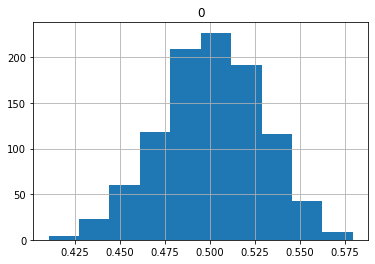

In [5]:
n_sim = 1000
models = [CropModel(crop=crop, climate=Climate(), soil=soil) for i in np.arange(n_sim)]

planting_date = 10

output = [model.run(do_output=True, planting_date=planting_date) for model in models]

s_avg = pd.DataFrame([o['s'].mean() for o in output])
s_avg.hist()